In [1]:
# Importing necessary libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score, explained_variance_score, mean_absolute_error, median_absolute_error
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [35]:
# Importing the data and creating the data frame

url = 'https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv'
powerplant_df = pd.read_csv(url, sep=',')
powerplant_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# Statstical Analysis of the data frame

powerplant_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
capacity_mw,907.0,326.223755,590.085456,0.0000,16.725000,59.200000,385.250000,4760.000
latitude,861.0,21.197918,6.239612,8.1689,16.773900,21.780000,25.512400,34.649
longitude,861.0,77.464907,4.939316,68.6447,74.256200,76.719500,79.440800,95.408
other_fuel3,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
commissioning_year,527.0,1997.091082,17.082868,1927.0000,1988.000000,2001.000000,2012.000000,2018.000
wepp_id,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year_of_capacity_data,519.0,2019.000000,0.000000,2019.0000,2019.000000,2019.000000,2019.000000,2019.000
generation_gwh_2013,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
generation_gwh_2014,398.0,2431.823590,4026.440035,0.0000,223.557672,801.123775,3035.306250,28127.000
generation_gwh_2015,422.0,2428.226946,4194.596959,0.0000,176.381063,711.181225,3084.121250,30539.000


In [4]:
# Shape of the data frame, 907 shows number of rows and 27 shows number of columns

powerplant_df.shape

(907, 27)

In [5]:
# Calcuating null values in the data

powerplant_df.isnull().sum()

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

In [6]:
# Dropping all columns which has 50% null values, which means 453 or more null values as they doesn't help us to build a sensible model

powerplant_df.drop(['other_fuel1', 'other_fuel2', 'other_fuel3', 'owner', 'wepp_id', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
                    'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018', 'generation_gwh_2019', 'generation_data_source', 'estimated_generation_gwh'], axis=1, inplace=True)

print("Shape of the new data: \n", powerplant_df.shape)

print()

print("Null values present in the data: \n", powerplant_df.isnull().sum())

print()

powerplant_df.head()

Shape of the new data: 
 (907, 13)

Null values present in the data: 
 country                    0
country_long               0
name                       0
gppd_idnr                  0
capacity_mw                0
latitude                  46
longitude                 46
primary_fuel               0
commissioning_year       380
source                     0
url                        0
geolocation_source        19
year_of_capacity_data    388
dtype: int64



,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,year_of_capacity_data
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0


In [7]:
# Replacing Null values in Latitude and Longitude columns with their respective mean value

for i in powerplant_df.columns:
    latitude_mean = powerplant_df['latitude'].mean()
    powerplant_df['latitude'].fillna(latitude_mean, inplace=True)

for i in powerplant_df.columns:
    longitude_mean = powerplant_df['longitude'].mean()
    powerplant_df['longitude'].fillna(longitude_mean, inplace=True)

print(powerplant_df['latitude'].isnull().sum())
print(powerplant_df['longitude'].isnull().sum())

0
0


In [8]:
# Replacing Null values in commissioning_year and geolocation_source with the Backward fill method (Value of next non-null value)
# Also, replacing Null values in year_of_capacity_data with Forward fill method (Value of previous non-null value)

powerplant_df['commissioning_year'].fillna(method='bfill', inplace=True)
powerplant_df['geolocation_source'].fillna(method='bfill', inplace=True)
powerplant_df['year_of_capacity_data'].fillna(method='ffill', inplace=True)

powerplant_df.isnull().sum()

# From the output, the dataset still has some null values

country                  0
country_long             0
name                     0
gppd_idnr                0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year       4
source                   0
url                      0
geolocation_source       0
year_of_capacity_data    3
dtype: int64

In [9]:
# Reversing the methods used in previous steps for both columns

powerplant_df['commissioning_year'].fillna(method='ffill', inplace=True)
powerplant_df['year_of_capacity_data'].fillna(method='bfill', inplace=True)

powerplant_df.isnull().sum()

# Now, the dataset has no null values

country                  0
country_long             0
name                     0
gppd_idnr                0
capacity_mw              0
latitude                 0
longitude                0
primary_fuel             0
commissioning_year       0
source                   0
url                      0
geolocation_source       0
year_of_capacity_data    0
dtype: int64

In [10]:
# Printing the new clean dataset which is ready for data visualisation and model building

powerplant_df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,url,geolocation_source,year_of_capacity_data
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2019.0
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,2004.0,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2019.0
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,2004.0,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2019.0
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0


<Axes: >

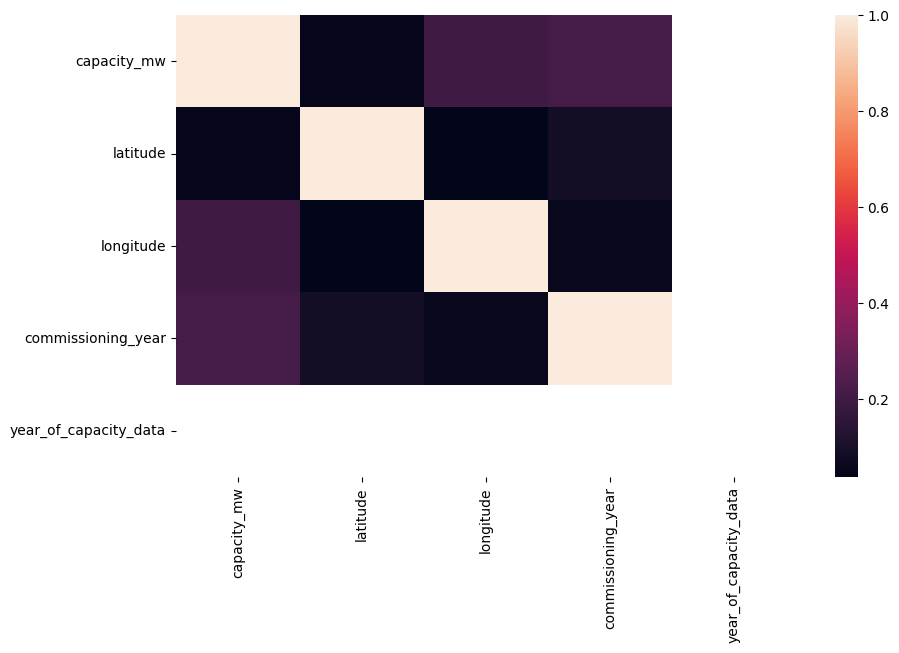

In [11]:
# Building the correlation matrix

plt.figure(figsize=(10, 6))
sns.heatmap(powerplant_df.corr())

In [12]:
# There is an issue with year_of_capacity_data column

powerplant_df['year_of_capacity_data'].unique()

array([2019.])

In [13]:
# From the previous code and the correlation plot, it is clear that year_of_capacity_data column has only one value, thus it should be dropped

powerplant_df.drop(['year_of_capacity_data'], axis=1, inplace=True)

In [14]:
# Correlation heatmap

import plotly.figure_factory as ff
corrs = powerplant_df.corr()
figure = ff.create_annotated_heatmap(
    z=corrs.values,
    x=list(corrs.columns),
    y=list(corrs.index),
    annotation_text=corrs.round(2).values,
    showscale=True)
figure.show()

In [15]:
# Data types of various column in the dataframe
# Also printing unique values of object target variable : primary_fuel

print(powerplant_df.dtypes)

country                object
country_long           object
name                   object
gppd_idnr              object
capacity_mw           float64
latitude              float64
longitude             float64
primary_fuel           object
commissioning_year    float64
source                 object
url                    object
geolocation_source     object
dtype: object


<Figure size 800x600 with 0 Axes>

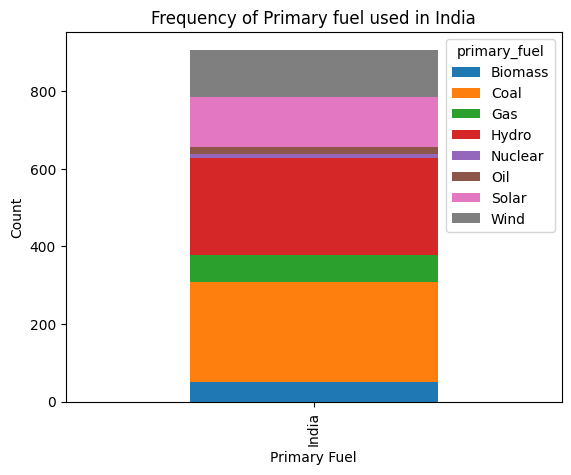

In [16]:
# Frequency of different fuel types used in India

# Create a bar plot
plt.figure(figsize=(8, 6))
powerplant_df.groupby(['country_long', 'primary_fuel']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Frequency of Primary fuel used in India')
plt.xlabel('Primary Fuel')
plt.ylabel('Count')
plt.show()

From the above graph, it is clear that the most commonly primary fuel used in India is Coal, and least being Nuclear

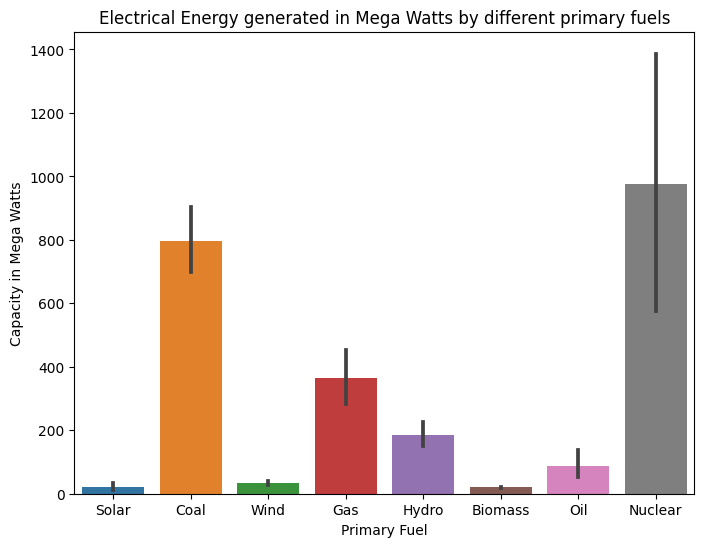

In [17]:
# How much capacity in megawatts of electrical energy is generated by different primary fuels

plt.figure(figsize=(8, 6))
sns.barplot(x='primary_fuel', y='capacity_mw', data=powerplant_df)
plt.xlabel('Primary Fuel')
plt.ylabel('Capacity in Mega Watts')
plt.title('Electrical Energy generated in Mega Watts by different primary fuels')
plt.show()

Taking insights from the above two graphs, Nuclear energy is generating the most amount of electrical energy even if it is used the least as a primary fuel, Coal being the second most powerful primary fuel in terms of electrical energy being generated

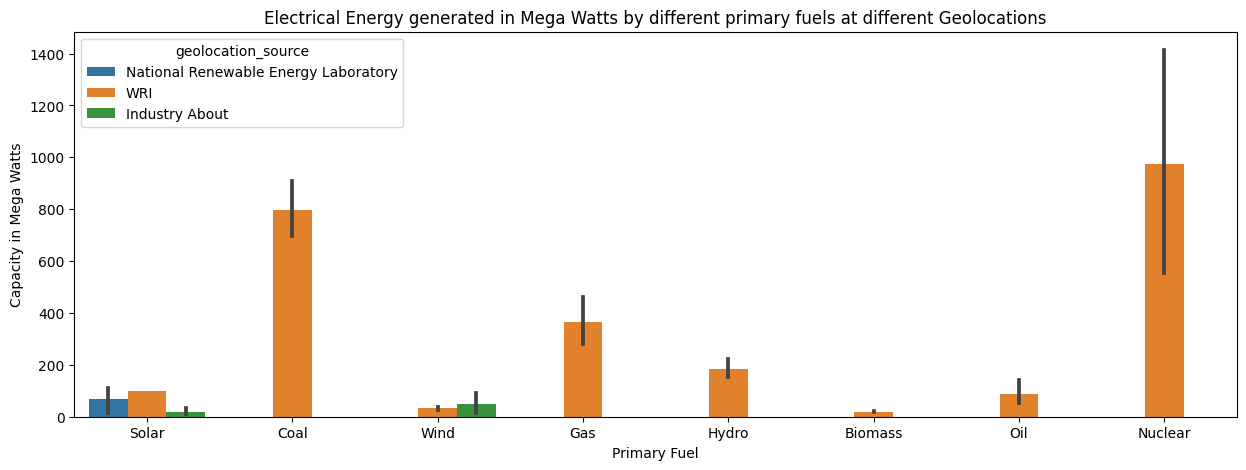

In [18]:
# Analyzing Electrical Energy generated in Mega Watts by different primary fuels at different Geolocations

plt.figure(figsize=(15, 5))
sns.barplot(x='primary_fuel', y='capacity_mw', hue='geolocation_source', data=powerplant_df)
plt.xlabel('Primary Fuel')
plt.ylabel('Capacity in Mega Watts')
plt.title('Electrical Energy generated in Mega Watts by different primary fuels at different Geolocations')
plt.show()

In [19]:
powerplant_df['primary_fuel'].value_counts()

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64

Even if there is class imbalance in our target variable, we cannot perform class imbalancing techniques as Nuclear level has its great importance, which gots clear from the previous set of visualizations

In [20]:
# From the previous data visualizations, it is clear that, there is only one country, let's check it out

print(powerplant_df['country'].unique())
print()
print(powerplant_df['country_long'].unique())

['IND']

['India']


In [21]:
# Since, there is only one country, hence we can drop "country" and "country_long" column. Additionally, "gppd_idnr", and "url" does not contribute much in model building thus dropping them as well

powerplant_df.drop(['country', 'country_long', 'gppd_idnr', 'url'], axis=1, inplace=True)
powerplant_df.shape

(907, 8)

In [22]:
powerplant_df.head()

,name,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,2004.0,Ultratech Cement ltd,WRI
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,2004.0,CDM,WRI
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI


In [23]:
# Copying the dataframe, for using it to build the seocond model

powerplant2_df = powerplant_df.copy()

# Model Building - 1 : Predicting "primary_fuel"

In [24]:
# Convert categorical columns into dummy variables

powerplant_df_dum = pd.get_dummies(powerplant_df, columns=['source', 'geolocation_source'], drop_first=True)

In [25]:
# Data spliting

X = powerplant_df_dum.drop(['primary_fuel', 'name'], axis=1) # name column is also not important for model building
y = powerplant_df_dum['primary_fuel']

In [26]:
# Spliting into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
svm_model = SVC(kernel='linear', C=1, decision_function_shape='ovr')
svm_model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

In [27]:
# Prediction

y_pred = svm_model.predict(X_test)
y_pred

array(['Hydro', 'Hydro', 'Wind', 'Hydro', 'Coal', 'Coal', 'Hydro', 'Coal',
       'Hydro', 'Coal', 'Biomass', 'Coal', 'Hydro', 'Biomass', 'Solar',
       'Biomass', 'Hydro', 'Hydro', 'Coal', 'Coal', 'Coal', 'Coal',
       'Hydro', 'Biomass', 'Solar', 'Hydro', 'Biomass', 'Hydro', 'Hydro',
       'Coal', 'Hydro', 'Hydro', 'Coal', 'Coal', 'Hydro', 'Hydro', 'Coal',
       'Solar', 'Solar', 'Biomass', 'Wind', 'Hydro', 'Wind', 'Biomass',
       'Hydro', 'Solar', 'Hydro', 'Solar', 'Hydro', 'Hydro', 'Wind',
       'Hydro', 'Hydro', 'Coal', 'Solar', 'Solar', 'Hydro', 'Hydro',
       'Hydro', 'Hydro', 'Biomass', 'Coal', 'Hydro', 'Hydro', 'Hydro',
       'Solar', 'Hydro', 'Hydro', 'Coal', 'Wind', 'Hydro', 'Hydro',
       'Solar', 'Hydro', 'Hydro', 'Hydro', 'Coal', 'Wind', 'Hydro',
       'Hydro', 'Hydro', 'Coal', 'Hydro', 'Wind', 'Biomass', 'Coal',
       'Solar', 'Coal', 'Biomass', 'Coal', 'Hydro', 'Coal', 'Solar',
       'Hydro', 'Hydro', 'Hydro', 'Hydro', 'Wind', 'Hydro', 'Wind',
       'Hydro

In [28]:
# Evaluation Metrics

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: \n", accuracy)
print()
confusion = confusion_matrix(y_test, y_pred)
print("Confusion Matrix: \n", confusion)
print()
classification_report = classification_report(y_test, y_pred)
print("Classification Report: \n", classification_report)

Accuracy: 
 0.8021978021978022

Confusion Matrix: 
 [[11  1  0  0  0  0  0]
 [ 2 39  0 13  0  0  0]
 [ 0  2  0 10  0  0  0]
 [ 0  6  0 59  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  0  0  0 22  0]
 [ 0  0  0  0  0  0 15]]

Classification Report: 
               precision    recall  f1-score   support

     Biomass       0.85      0.92      0.88        12
        Coal       0.81      0.72      0.76        54
         Gas       0.00      0.00      0.00        12
       Hydro       0.70      0.91      0.79        65
         Oil       0.00      0.00      0.00         2
       Solar       1.00      1.00      1.00        22
        Wind       1.00      1.00      1.00        15

    accuracy                           0.80       182
   macro avg       0.62      0.65      0.63       182
weighted avg       0.75      0.80      0.77       182



# Model Building - 2 : Predicting "capacity_mw"

In [24]:
# Data to be used for this model

powerplant2_df.head()

,name,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,ACME Solar Tower,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,2004.0,Ultratech Cement ltd,WRI
2,AES Saurashtra Windfarms,39.2,21.9038,69.3732,Wind,2004.0,CDM,WRI
3,AGARTALA GT,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI
4,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI


In [25]:
# The output of this code, shows there are 191 levels of 'Source' column, so later we can drop this variable for model building

powerplant2_df['source'].value_counts()

Central Electricity Authority                                  519
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
                                                              ... 
Harsha Engineers Limited                                         1
Godawari Energy ltd                                              1
Sunkon Energy Private Limited                                    1
West Bengal Energy Development Corporation Limited (WBEDCL)      1
Yashwantrao Krishna ssk                                          1
Name: source, Length: 191, dtype: int64

In [26]:
# Convert categorical columns into dummy variables

powerplant2_df_dum = pd.get_dummies(powerplant2_df, columns=['geolocation_source', 'primary_fuel'], drop_first=True)

In [27]:
# Extracting the independent and dependent variables

X = powerplant2_df_dum.drop(['capacity_mw', 'name', 'source'], axis=1) # name and source columns are irrelevant for model building
y = powerplant2_df_dum['capacity_mw']

In [28]:
# Splitting the dataset

from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 123)

In [33]:
from xgboost import XGBRegressor

# Create an XGBoost Regressor
xgb_regressor = XGBRegressor()
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3],
    'subsample': [0.8, 1.0],
}

In [34]:
# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(xgb_regressor, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_xgb_regressor = grid_search.best_estimator_

# Predictions
y_pred = best_xgb_regressor.predict(X_test)

# Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Best XGBoost Regressor MSE:", mse)

Best XGBoost Regressor MSE: 352483.7760479488
